# Steam Sales Data Exploration

This notebook performs exploratory data analysis on Steam game sales data, examining pricing patterns, discounts, platform availability, and release trends.

## Setup

Importing essential libraries for data manipulation, analysis, and visualization.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Initial Cleaning

This cell loads the Steam sales dataset and performs initial data cleaning:

1. **Load the dataset** from the CSV file
2. **Clean column names** - Convert to snake_case for consistency and easier coding
3. **Clean numeric columns** - Remove commas from review counts and convert to float
4. **Parse dates** - Convert release dates from strings to datetime objects for time-based analysis
5. **Display overview** - Show dataset info, first rows, shape, and summary statistics 

In [7]:
steam_sales_path = "../data/steam_sales.csv"
df = pd.read_csv(steam_sales_path)

# Clean column names: convert to snake_case for consistency
column_mapping = {
    'Game Name': 'game_name',
    'Rating': 'rating',
    '#Reviews': 'num_reviews',
    'Discount%': 'discount_pct',
    'Price (€)': 'price_eur',
    'Original Price (€)': 'original_price_eur',
    'Release Date': 'release_date',
    'Windows': 'windows',
    'Linux': 'linux',
    'MacOS': 'macos',
    'Fetched At': 'fetched_at'
}
df = df.rename(columns=column_mapping)

# Clean num_reviews column: remove commas and convert to float
df['num_reviews'] = df['num_reviews'].str.replace(',', '', regex=False).astype(float)

# Convert release_date to datetime for easier time-based analysis
df['release_date'] = pd.to_datetime(df['release_date'], format="%d %b, %Y", errors='coerce')

# Quick overview
print("Dataset info:")
print(df.info())

print("\nFirst 5 rows:")
display(df.head())

print(f"\nShape of dataset: {df.shape}")
print("\nSummary statistics:")
display(df.describe())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543 entries, 0 to 2542
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   game_name           2543 non-null   object        
 1   rating              2543 non-null   float64       
 2   num_reviews         2543 non-null   float64       
 3   discount_pct        2543 non-null   float64       
 4   price_eur           2543 non-null   float64       
 5   original_price_eur  2543 non-null   float64       
 6   release_date        732 non-null    datetime64[ns]
 7   windows             2543 non-null   int64         
 8   linux               2543 non-null   int64         
 9   macos               2543 non-null   int64         
 10  fetched_at          2543 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 218.7+ KB
None

First 5 rows:


,game_name,rating,num_reviews,discount_pct,price_eur,original_price_eur,release_date,windows,linux,macos,fetched_at
0,PEAK,7.0,77683.0,-38.0,4.64,7.49,2025-06-16,1,0,0,2025-08-11 00:00
1,Cyberpunk 2077,7.0,772574.0,-65.0,20.99,59.99,2020-12-09,1,0,1,2025-08-11 00:00
2,Rust,7.0,1038433.0,-50.0,19.99,39.99,2018-02-08,1,0,1,2025-08-11 00:00
3,Microsoft Flight Simulator (2020) 40th Anniver...,5.0,63905.0,-60.0,27.99,69.99,2020-08-17,1,0,0,2025-08-11 00:00
4,Sid Meier's Civilization VII,4.0,34643.0,-30.0,48.99,69.99,2025-02-10,1,1,1,2025-08-11 00:00



Shape of dataset: (2543, 11)

Summary statistics:


,rating,num_reviews,discount_pct,price_eur,original_price_eur,release_date,windows,linux,macos
count,2543.000000,2.543000e+03,2543.000000,2543.000000,2543.000000,732,2543.000000,2543.000000,2543.000000
mean,6.433346,1.845428e+04,-51.055053,12.742993,27.949866,2021-09-30 02:55:04.918032896,0.996068,0.185608,0.281950
min,3.000000,1.000000e+01,-95.000000,0.530000,2.990000,2006-12-07 00:00:00,0.000000,0.000000,0.000000
25%,5.000000,1.013500e+03,-74.500000,5.990000,15.990000,2019-09-20 12:00:00,1.000000,0.000000,0.000000
50%,7.000000,3.344000e+03,-50.000000,9.990000,24.990000,2022-12-07 00:00:00,1.000000,0.000000,0.000000
75%,7.000000,1.391550e+04,-30.000000,16.990000,39.990000,2024-10-07 12:00:00,1.000000,0.000000,1.000000
max,8.000000,1.038433e+06,-10.000000,64.990000,99.990000,2025-09-14 00:00:00,1.000000,1.000000,1.000000
std,1.279637,5.650066e+04,23.132706,8.990933,15.762686,NaN,0.062597,0.388866,0.450038


## Top Rated Games by Platform

This analysis identifies the highest-rated games for each platform (Windows, Linux, MacOS). Games are sorted by rating in descending order to highlight the best-reviewed titles available on each platform.

In [8]:
platforms = ['windows', 'linux', 'macos']
top_n = 5

for plat in platforms:
    print(f"Top {top_n} games for {plat.capitalize()}:")
    display(
        df[df[plat] == 1]
        .sort_values('rating', ascending=False)
        .head(top_n)
        [['game_name', 'rating', 'price_eur', 'discount_pct']]
    )

Top 5 games for Windows:


,game_name,rating,price_eur,discount_pct
2128,Arctic Eggs,8.0,4.99,-50.0
284,ROUNDS,8.0,2.74,-50.0
1903,Human Fall Flat,8.0,5.99,-70.0
538,SOMA,8.0,8.99,-70.0
935,FlyKnight,8.0,4.79,-20.0


Top 5 games for Linux:


,game_name,rating,price_eur,discount_pct
1021,Astral Ascent,8.0,12.49,-50.0
415,Is This Seat Taken?,8.0,8.99,-10.0
1080,Danganronpa: Trigger Happy Havoc,8.0,13.99,-30.0
1075,The Jackbox Party Pack 4,8.0,11.24,-55.0
1480,Dead Cells,8.0,10.99,-50.0


Top 5 games for Macos:


,game_name,rating,price_eur,discount_pct
1784,Beastieball,8.0,16.99,-15.0
1269,The Henry Stickmin Collection,8.0,5.99,-60.0
2022,NEEDY STREAMER OVERLOAD,8.0,7.99,-50.0
737,Baldur's Gate 3,8.0,44.99,-25.0
802,Slay the Spire,8.0,8.49,-66.0


## Platform Availability Analysis

This visualization shows the total number of games available on each platform. This helps understand platform market share and the distribution of game availability across Windows, Linux, and MacOS.

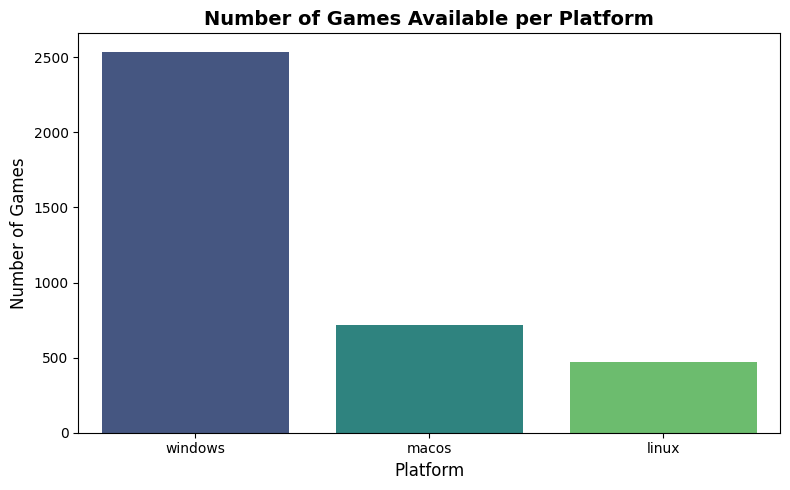

In [9]:
platform_counts = df[['windows', 'linux', 'macos']].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=platform_counts.index, y=platform_counts.values, hue=platform_counts.index, palette='viridis', legend=False)
plt.title('Number of Games Available per Platform', fontsize=14, fontweight='bold')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.tight_layout()
plt.show()

## Discount Distribution Analysis

This histogram shows the distribution of discount percentages across all games in the dataset. Understanding discount patterns helps identify common pricing strategies, such as whether games typically go on sale at specific discount levels (e.g., 50%, 70%, etc.). 

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df['discount_pct'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Discount Percentages', fontsize=14, fontweight='bold')
plt.xlabel('Discount (%)', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

## Average Discount by Platform

This analysis compares the average discount percentage across different platforms. This helps identify whether certain platforms tend to have more aggressive discounting strategies or if pricing patterns differ between Windows, Linux, and MacOS.

/var/folders/th/ggxxzbv16pvd12pt0k2h8rtr0000gn/T/ipykernel_7727/1752582402.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avg_discount.keys()), y=list(avg_discount.values()), palette='coolwarm')


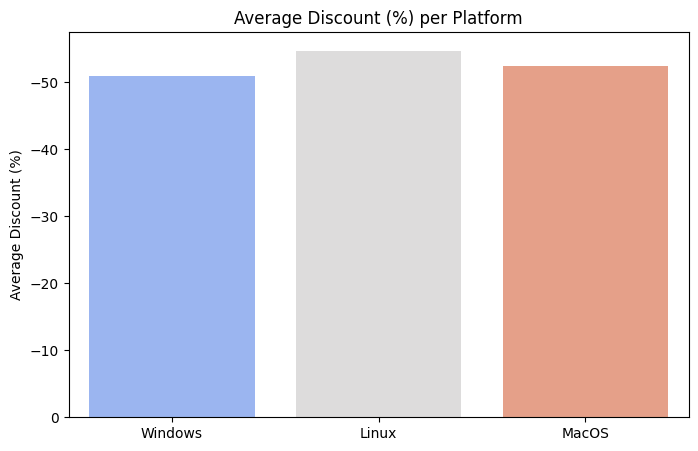

In [ ]:
avg_discount = {plat: df[df[plat] == 1]['discount_pct'].mean() for plat in platforms}
plt.figure(figsize=(8, 5))
sns.barplot(x=list(avg_discount.keys()), y=list(avg_discount.values()), 
            hue=list(avg_discount.keys()), palette='coolwarm', legend=False)
plt.title('Average Discount Percentage per Platform', fontsize=14, fontweight='bold')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Average Discount (%)', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Game Release Distribution by Year

This analysis visualizes how many games were released each year on Steam. The chart shows the evolution of Steam as a publishing platform, highlighting periods of growth, decline, or stability in game releases over time.

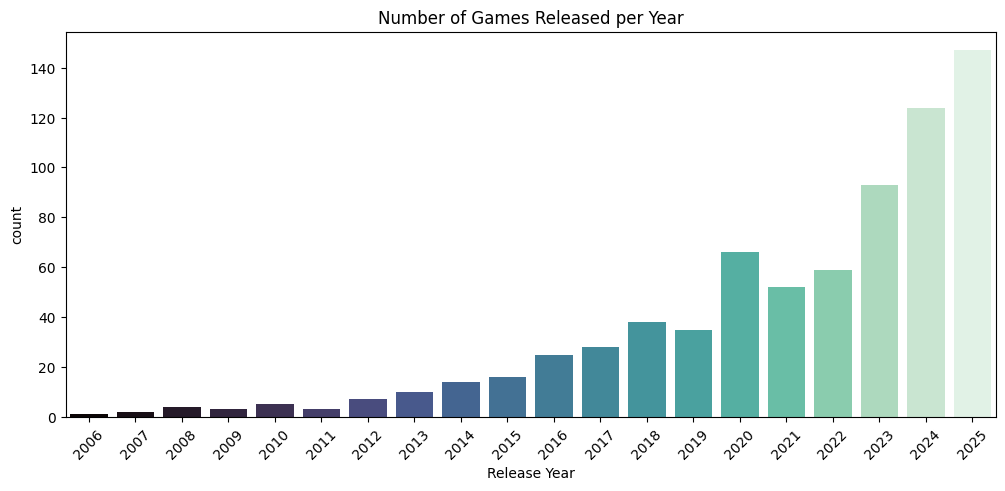

In [ ]:
df['release_year'] = df['release_date'].dt.year

# For plotting, use only rows with a year and cast to plain int
plot_df = df[df['release_year'].notna()].copy()
plot_df['release_year_int'] = plot_df['release_year'].astype(int)

order = sorted(plot_df['release_year_int'].unique())

plt.figure(figsize=(12, 5))
sns.countplot(
    x='release_year_int',
    hue='release_year_int',
    data=plot_df,
    palette='mako',
    order=order,
    legend=False
)
plt.title('Number of Games Released per Year', fontsize=14, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### Key Insights: Game Release Trends

**Early Period (2006-2014)**: Very few titles per year, indicating limited Steam adoption and incomplete data coverage. These early values should be interpreted cautiously.

**Growth Period (2015-2019)**: Steady increase in releases, coinciding with Steam Direct (2017) which lowered publishing barriers and encouraged indie game releases.

**Expansion Period (2020-2025)**: Sharp acceleration in new titles, driven by pandemic-related digital entertainment growth, improved development tools, and platform diversification.

**Recommendation**: For meaningful trend analysis, focus on the **2015-2025** period when data density and platform maturity make the sample more reliable for examining price, genre, and rating trends.


## Correlation Analysis

This heatmap visualizes the correlation coefficients between all numerical variables in the dataset. Correlation values range from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no linear relationship. This helps identify relationships between variables like price, ratings, reviews, discounts, and platform availability.

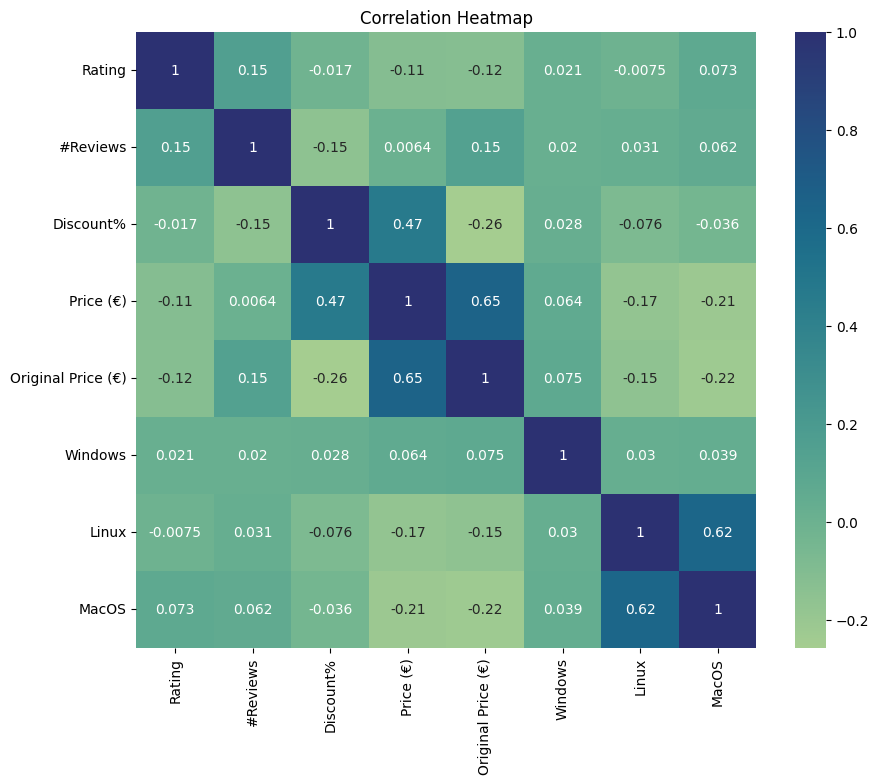

In [ ]:
plt.figure(figsize=(10, 8))
correlation_cols = ['rating', 'num_reviews', 'discount_pct', 'price_eur', 
                     'original_price_eur', 'windows', 'linux', 'macos']

# Reverse the original column_mapping to get original names for display
reverse_mapping = {v: k for k, v in column_mapping.items()}

# Calculate correlation matrix
corr_matrix = df[correlation_cols].corr()

# Rename columns and index to original names for display
corr_matrix_display = corr_matrix.rename(columns=reverse_mapping, index=reverse_mapping)

sns.heatmap(corr_matrix_display, annot=True, cmap='crest', 
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
df.describe()

,Rating,Discount%,Price (€),Original Price (€),Windows,Linux,MacOS
count,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,6.433346,-51.055053,12.742993,27.949866,0.996068,0.185608,0.281950
std,1.279637,23.132706,8.990933,15.762686,0.062597,0.388866,0.450038
min,3.000000,-95.000000,0.530000,2.990000,0.000000,0.000000,0.000000
25%,5.000000,-74.500000,5.990000,15.990000,1.000000,0.000000,0.000000
50%,7.000000,-50.000000,9.990000,24.990000,1.000000,0.000000,0.000000
75%,7.000000,-30.000000,16.990000,39.990000,1.000000,0.000000,1.000000
max,8.000000,-10.000000,64.990000,99.990000,1.000000,1.000000,1.000000


### Summary Statistics Interpretation

**Dataset Overview**: 2,543 games with complete numerical data.

**Key Findings**:
- **Ratings**: Average rating of 6.4 out of 8, indicating generally positive reception
- **Discounts**: Average discount of 51%, showing most games are sold below original price
- **Pricing**: Mean discounted price €12.74 vs. original price €27.95 (54% reduction on average)
- **Platform Support**: Nearly all games support Windows (99.6%), while Linux (18.6%) and MacOS (28.2%) have lower availability

**Note**: The release date column is excluded from numerical statistics as it's a datetime type, but it's available for time-based analysis.

In [5]:
df.dtypes

Game Name              object
Rating                float64
#Reviews               object
Discount%             float64
Price (€)             float64
Original Price (€)    float64
Release Date           object
Windows                 int64
Linux                   int64
MacOS                   int64
Fetched At             object
dtype: object

In [ ]:
# This cell was redundant - removed

,Rating,Discount%,Price (€),Original Price (€),Release Date,Windows,Linux,MacOS
count,2543.000000,2543.000000,2543.000000,2543.000000,732,2543.000000,2543.000000,2543.000000
mean,6.433346,-51.055053,12.742993,27.949866,2021-09-30 02:55:04.918032896,0.996068,0.185608,0.281950
min,3.000000,-95.000000,0.530000,2.990000,2006-12-07 00:00:00,0.000000,0.000000,0.000000
25%,5.000000,-74.500000,5.990000,15.990000,2019-09-20 12:00:00,1.000000,0.000000,0.000000
50%,7.000000,-50.000000,9.990000,24.990000,2022-12-07 00:00:00,1.000000,0.000000,0.000000
75%,7.000000,-30.000000,16.990000,39.990000,2024-10-07 12:00:00,1.000000,0.000000,1.000000
max,8.000000,-10.000000,64.990000,99.990000,2025-09-14 00:00:00,1.000000,1.000000,1.000000
std,1.279637,23.132706,8.990933,15.762686,NaN,0.062597,0.388866,0.450038


## Price and Release Year Cross-Tabulation

This analysis explores how game pricing patterns have evolved over time by creating a cross-tabulation of price ranges against release year intervals. This helps identify trends such as whether newer games tend to be priced differently than older titles, and how the distribution of price points has changed across different release periods.

### Methodology

1. **Extract Release Year**: Convert release dates to numeric year values
2. **Create Price Ranges**: Categorize games into price brackets (€0-30, €30-40, €40-50, €50-60, €60+)
3. **Create Year Intervals**: Group release years into 5-year periods to reduce variability
4. **Cross-Tabulation**: Count games in each price range × year interval combination


In [ ]:
# Extract release year if not already done
if 'release_year' not in df.columns:
    df['release_year'] = df['release_date'].dt.year

# Create price range categories
price_bins = [0, 30, 40, 50, 60, float('inf')]
price_labels = ['0-30', '30-40', '40-50', '50-60', '60+']
df['price_range'] = pd.cut(df['original_price_eur'], bins=price_bins, labels=price_labels, right=False)

# Create year interval categories
year_bins = [2000, 2005, 2010, 2015, 2020, 2025, 2030]
year_labels = ['2000–2004', '2005–2009', '2010–2014', '2015–2019', '2020–2024', '2025+']
df['year_interval'] = pd.cut(df['release_year'], bins=year_bins, labels=year_labels, right=False)

# Create cross-tabulation
cross_tab = pd.crosstab(df['price_range'], df['year_interval'])
print("Cross-tabulation: Price Range × Release Year Interval")
print("(Values represent number of games)")
display(cross_tab)

Year Interval,2005–2009,2010–2014,2015–2019,2020–2024,2025+
Price Range,,,,,
0-30,10,31,106,266,121
30-40,0,3,21,65,13
40-50,0,2,8,33,6
50-60,0,3,6,23,3
60+,0,0,1,7,4


### Key Observations

- **Lower-priced games (€0-30) dominate** across all time periods, especially in 2020-2024
- **Mid-range prices (€30-60) are less common**, suggesting fewer premium-priced releases on Steam
- **Post-2015 growth**: Increased counts across all price categories reflect platform expansion
- **Market shift**: The dominance of lower-priced games may indicate changing market strategies, consumer preferences, or shifts in game types being published

**Note**: Further analysis needed to determine if trends are driven by market strategies, consumer demand, or game type evolution.  
The gradual increase in counts across all categories after 2015 reflects the platform’s growth and a larger overall volume of releases in the last decade.  
Further analysis of the **price distribution over time** is needed to determine whether these trends are driven by changing market strategies, consumer demand, or shifts in the types of games being published.


### Filtering Out Games Released Before 2015

This step filters the dataset to include only games released after the year 2015. 


In [ ]:
# Filter games released in 2015 or later
df_post_2015 = df[df['release_date'].dt.year >= 2015].copy()

# Save to CSV
output_path = "../data/steam_sales_post_2015.csv"
df_post_2015.to_csv(output_path, index=False)

print(f"Filtered dataset saved to {output_path}")
print(f"Total games in filtered dataset: {len(df_post_2015)}")
print(f"Games per year:")
print(df_post_2015['release_year'].value_counts().sort_index())